In [11]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import scipy.stats as stats
import xarray as xr

rc("font", **{"family": "Times"})
rc("text", usetex=True)
plt.rcParams['figure.dpi'] = 300

# verison = "no_transform"
# version = "sqrt"
version = "transform_0.1"

test_frames = xr.open_dataset("test.nc").pr.values.reshape(-1, 64, 64)
sample_frames = torch.load(f"samples_{version}.pt", map_location=torch.device('cpu')).reshape(-1, 64, 64).numpy()

In [3]:
def psd_spatial(frames):
    fourier_image = np.fft.fftn(frames, axes = (1, 2))
    fourier_amplitudes = np.abs(fourier_image) ** 2

    npix = frames.shape[1]

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0] ** 2 + kfreq2D[1] ** 2)
    knrm = knrm.flatten()

    kbins = np.arange(0.5, npix // 2 + 1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic( 
        knrm,
        fourier_amplitudes.reshape(-1, npix * npix), 
        statistic = "mean",
        bins = kbins
    )
    Abins *= np.pi * (kbins[1:] ** 2 - kbins[:-1] ** 2)
    Abins = np.mean(Abins, axis = 0)

    return kvals, Abins

# kvals_test, Abins_test = psd_spatial(test_frames)
# kvals_sample, Abins_sample = psd_spatial(sample_frames)

# plt.figure(figsize=(6, 4))
# plt.loglog(kvals_test, Abins_test, label="UKCP18")
# plt.loglog(kvals_sample, Abins_sample, label="Generated")
# plt.xlabel("$k$")
# plt.ylabel("$P(k)$")
# plt.legend()
# plt.show()

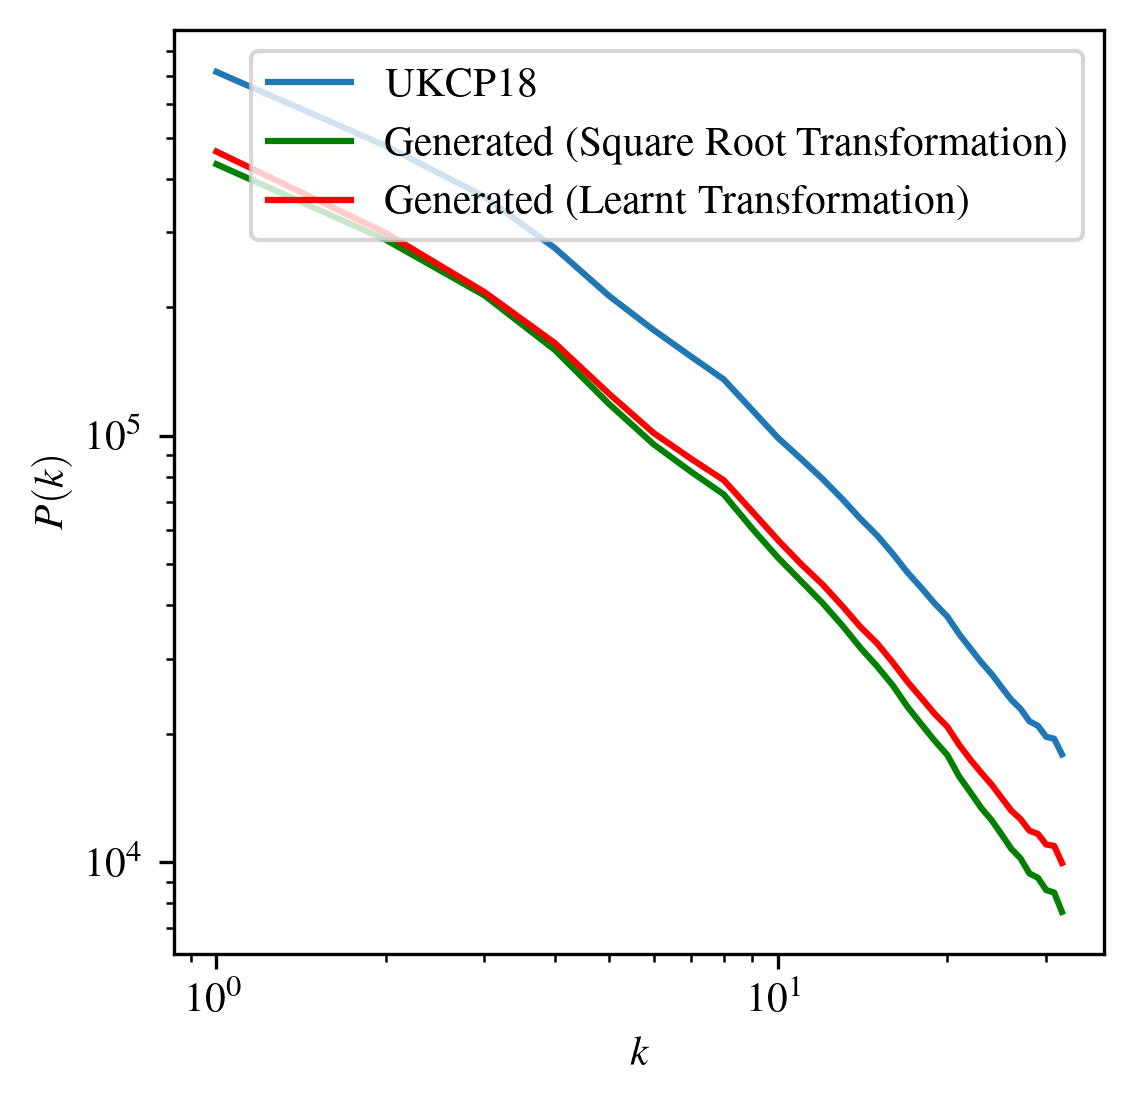

In [9]:
test_frames = xr.open_dataset("test.nc").pr.values.reshape(-1, 64, 64)
sample_sqrt_frames = torch.load(f"samples_sqrt.pt", map_location=torch.device('cpu')).reshape(-1, 64, 64).numpy()
sample_transform_frames = torch.load(f"samples_transform_0.1.pt", map_location=torch.device('cpu')).reshape(-1, 64, 64).numpy()

kvals_test, Abins_test = psd_spatial(test_frames)
kvals_sample_sqrt, Abins_sample_sqrt = psd_spatial(sample_sqrt_frames)
kvals_sample_transform, Abins_sample_transform = psd_spatial(sample_transform_frames)

plt.figure(figsize=(4, 4))
plt.loglog(kvals_test, Abins_test, label="UKCP18")
plt.loglog(kvals_sample_sqrt, Abins_sample_sqrt, label="Generated (Square Root Transformation)", c = "green")
plt.loglog(kvals_sample_transform, Abins_sample_transform, label="Generated (Learnt Transformation)", c = "red")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.savefig("examples/psd_spatial.png", bbox_inches="tight", pad_inches=0.02)
plt.show()

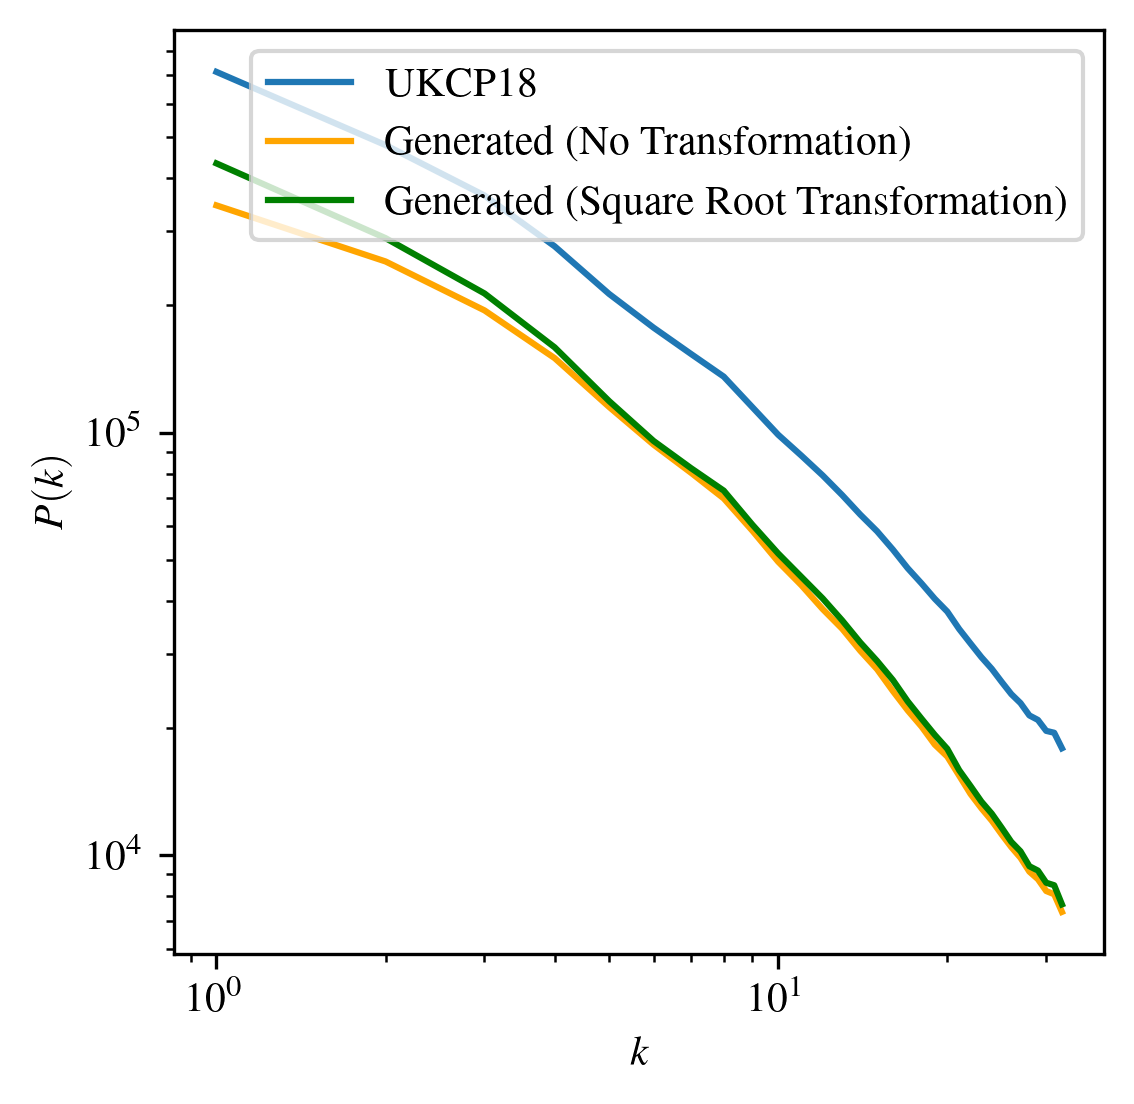

In [15]:
test_frames = xr.open_dataset("test.nc").pr.values.reshape(-1, 64, 64)
sample_no_transform_frames = torch.load(f"samples_no_transform.pt", map_location=torch.device('cpu')).reshape(-1, 64, 64).numpy()
sample_sqrt_frames = torch.load(f"samples_sqrt.pt", map_location=torch.device('cpu')).reshape(-1, 64, 64).numpy()

kvals_test, Abins_test = psd_spatial(test_frames)
kvals_sample_no_transform, Abins_sample_no_transform = psd_spatial(sample_no_transform_frames)
kvals_sample_sqrt, Abins_sample_sqrt = psd_spatial(sample_sqrt_frames)

plt.figure(figsize=(4, 4))
plt.loglog(kvals_test, Abins_test, label="UKCP18")
plt.loglog(kvals_sample_no_transform, Abins_sample_no_transform, label="Generated (No Transformation)", c = "orange")
plt.loglog(kvals_sample_sqrt, Abins_sample_sqrt, label="Generated (Square Root Transformation)", c = "green")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.savefig("examples/psd_spatial.png", bbox_inches="tight", pad_inches=0.02)
plt.show()